<a href="https://colab.research.google.com/github/Limonsitox/StephaniF-SSF-oto24-Stehani-Vianey-Francisco-Limon/blob/main/Copia_de_SSF_Oto24StephanivianeyfranciscolimonTAREA6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [ ]:
def solve_lorenz(state, t, σ, ρ, β):
  x, y, z = state

  dx = σ * (y - x)
  dy = x * (ρ - z) - y
  dz = (x * y) - (β * z)
  return dx, dy, dz

# Ejemplo resolviendo para ciertas condiciones iniciales
solve_lorenz((1, 1, 1), t=1, σ=10, ρ=28, β=8/3)

(0, 26, -1.6666666666666665)

In [ ]:
initial_state = (1., 1., 1.)
σ, ρ, β = 10, 28, 8/3

t = np.linspace(0, 100, 3000)

print('Valores equidistantes de t:', t.size)

Valores equidistantes de t: 3000


In [ ]:
states = odeint(solve_lorenz, initial_state, t, args=(σ, ρ, β))

xs = states[:, 0]
ys = states[:, 1]
zs = states[:, 2]

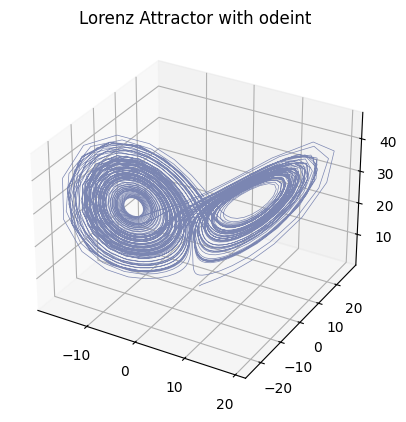

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5, c='#7B86B2')
ax.set_title("Lorenz Attractor with odeint")
plt.show()

In [ ]:
cmap = plt.cm.plasma
print("Tipo del objeto colormap:", type(cmap))
# Los colores pueden ser accedidos directamente por indexación
print("Elemento indexado:", cmap(0))

Tipo del objeto colormap: <class 'matplotlib.colors.ListedColormap'>
Elemento indexado: (0.050383, 0.029803, 0.527975, 1.0)


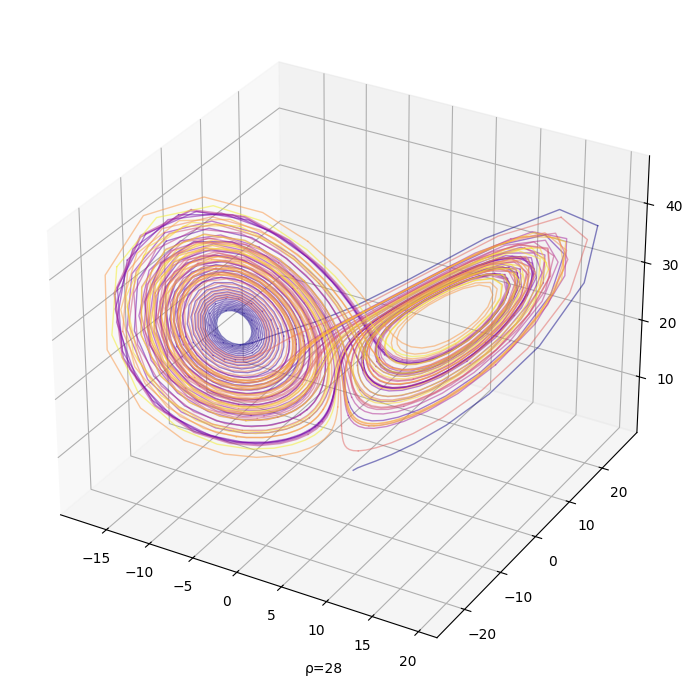

In [ ]:
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
  σ, ρ, β = parameters
  n = 3000
  t = np.linspace(0, 100, n)

  # Resolvemos las ecuaciones para la secuencia de puntos t
  states = odeint(solve_lorenz, state0, t, args=(σ, ρ, β))
  xs = states[:, 0]
  ys = states[:, 1]
  zs = states[:, 2]

  if ax is None:
    ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

  # Intervalos de 10 unidades de ancho
  s = 10

  # Iteramos en estos intervalos aplicando el colormap correspondiente
  for i in range(0, n-s ,s):
    ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/n), alpha=0.5, lw=1)

  ax.text2D(0.44, text_offset, f"ρ={ρ}", transform=ax.transAxes)
  ax.figure.tight_layout()
  return ax.figure

# Condiciones iniciales propuestas en la Figura 1
lorenz_attractor((1, 1, 1), (10, 28, 8/3)).show()

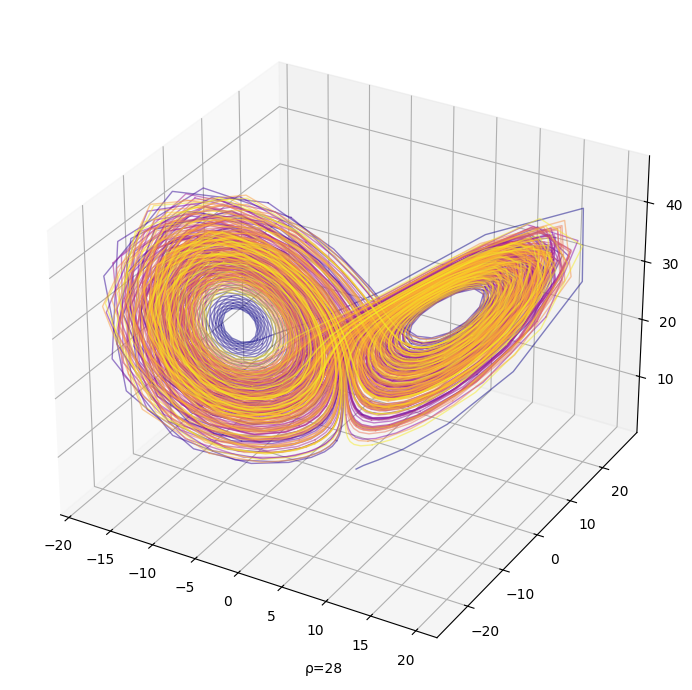

In [ ]:
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
  σ, ρ, β = parameters
  n = 8000
  t = np.linspace(0, 400, n)

  # Resolvemos las ecuaciones para la secuencia de puntos t
  states = odeint(solve_lorenz, state0, t, args=(σ, ρ, β))
  xs = states[:, 0]
  ys = states[:, 1]
  zs = states[:, 2]

  if ax is None:
    ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

  # Intervalos de 10 unidades de ancho
  s = 10

  # Iteramos en estos intervalos aplicando el colormap correspondiente
  for i in range(0, n-s ,s):
    ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/n), alpha=0.5, lw=1)

  ax.text2D(0.44, text_offset, f"ρ={ρ}", transform=ax.transAxes)
  ax.figure.tight_layout()
  return ax.figure

# Condiciones iniciales propuestas en la Figura 1
lorenz_attractor((1, 1, 1), (10, 28, 8/3)).show()

In [ ]:
rows, cols = 2, 2
size = (10, 10)

IndexError: index 4 is out of bounds for axis 1 with size 3

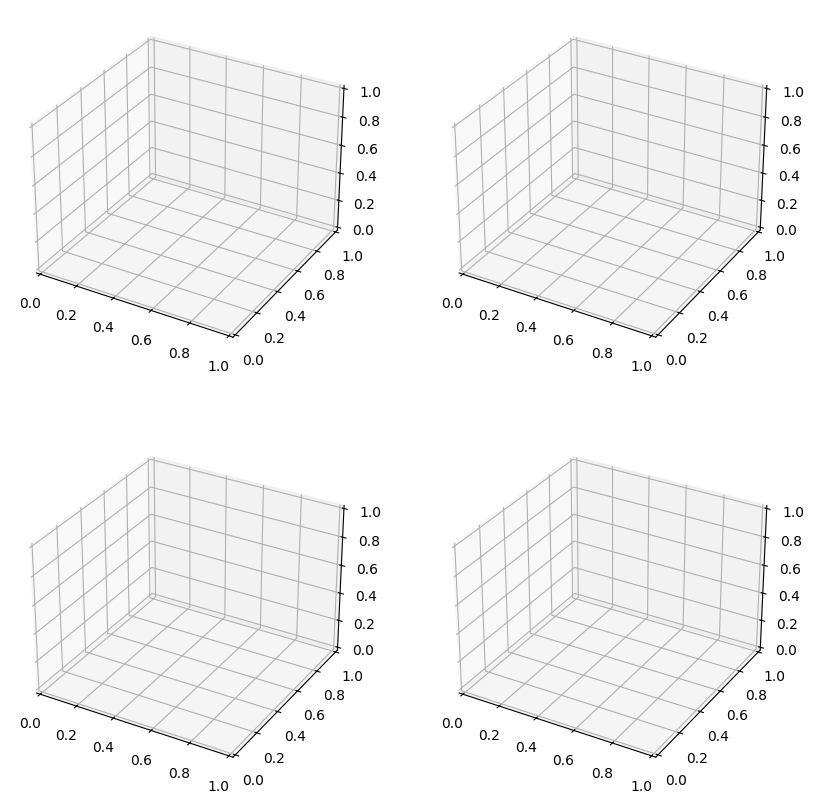

In [ ]:
# Instanciamos nuestra figura y sus axes
fig, axs = plt.subplots(rows, cols, figsize=size, subplot_kw = dict(projection='3d'))

# Transformamos el array a uno bidimensional de rows×cols
rho_values2d = np.array(rho_values).reshape(rows, cols)

# Iteramos en (0, 0), (0, 1), (1, 0), (1, 1)
for row, col in np.ndindex((rows, cols)):
  rho = rho_values2d[row ,col]
  # Introducimos el eje correspondiente en nuestra función
  lorenz_attractor((1, 1, 1),
                   (10, rho, 8/3),
                   ax=axs[row, col],
                   text_offset=-0.03)

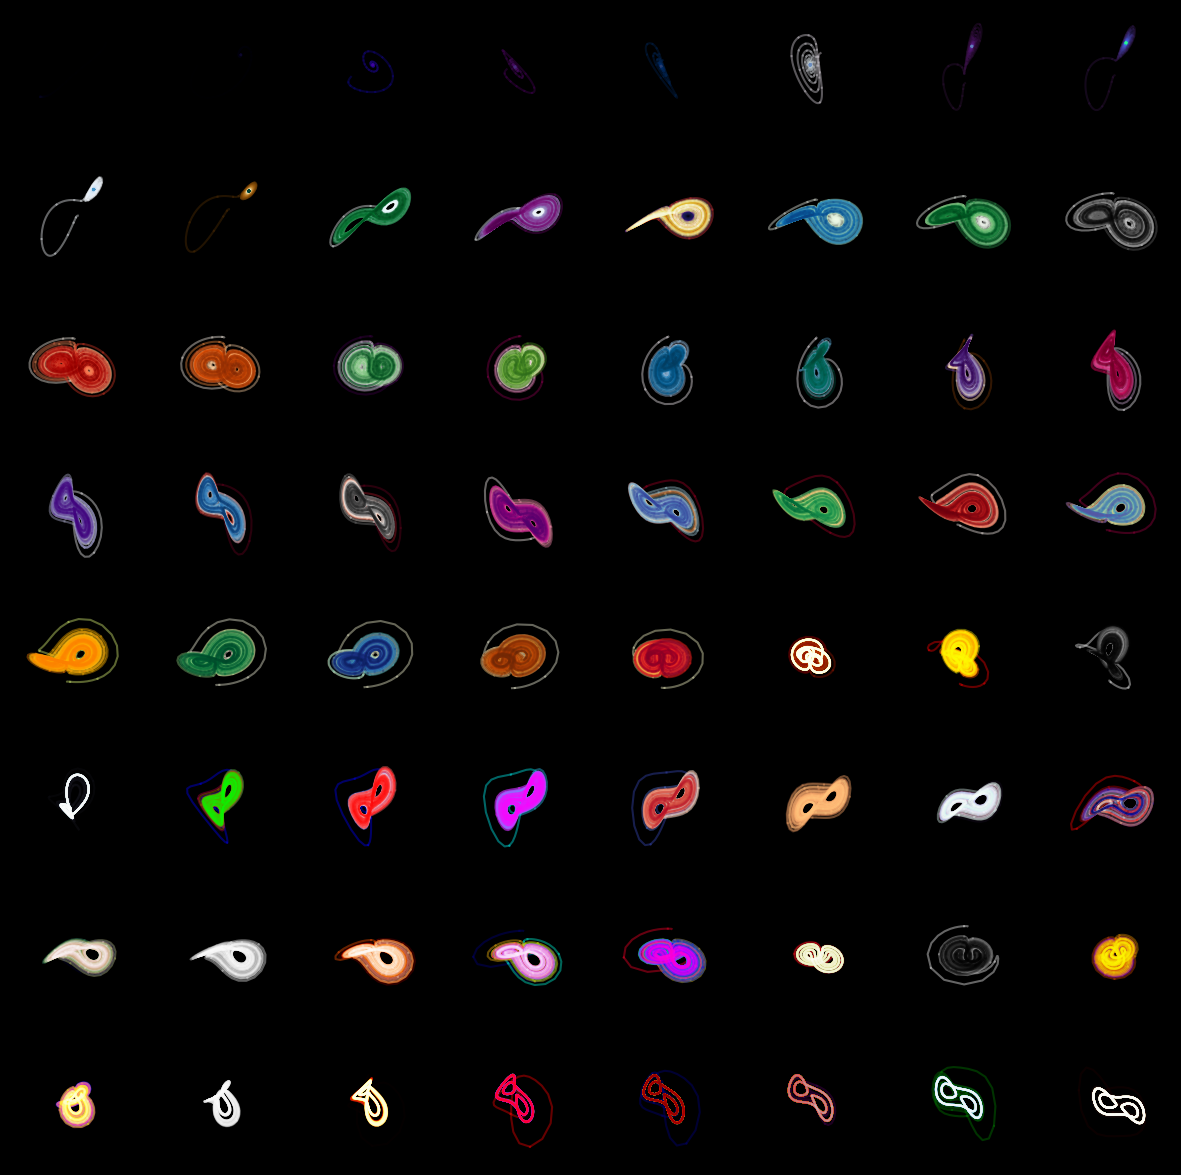

In [ ]:
fsize = (15, 15)
ndim = 8

def butterfly(ax, colormap, rho, angle):
  tmax = 100
  n = 10000
  sigma, rho, beta = (10, rho, 2.667)
  u0, v0, w0 = (0, 1, 1.05)
  t = np.linspace(0, tmax, n)

  soln = odeint(solve_lorenz, (u0, v0, w0), t, args=(sigma, rho, beta))
  # Interpolate solution onto the time grid, t.
  x, y, z = soln[:, 0], soln[:, 1], soln[:, 2]

  ax.set_facecolor('k')

  s = 10
  cmap = getattr(plt.cm, colormap)
  for i in range(0,n-s,s):
      ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

  # Remove all the axis clutter, leaving just the curve.
  ax.set_axis_off()
  ax.view_init(angle, angle)

axs = plt.figure(facecolor='k', figsize=fsize).subplots(ndim, ndim, subplot_kw = dict(projection='3d'))

for i, (row, col) in enumerate(np.ndindex((ndim, ndim))):
  butterfly(axs[row, col], plt.colormaps()[i], rho=2.5*i, angle=10*i)
